# **Data Mining Project** - Heart Disease Prediction

Group Members:

1)Thanuja sekar

2)Bhoomika Kapoor

3)Rachel Guy



#### **1.Business Problem that can be addressed through application of analytics**

Cardiovascular Disease is a group of medical conditions that cannot be reversed without medications, which impact the heart and blood vessels.It is the leading cause of death in the US, where "1 person dies every 34 seconds".The goal of this study is to determine whether an individual will develop cardiovascular disease or not, with 1 or more risk factors present.This analysis of cardiovascular datasets can help businesses to improve patient outcomes, reduce healthcare costs, and develop new products and services that address the needs of patients with cardiovascular disease.The healthcare providers and pharmaceutical companies will also be able to develop better treatments and improve patient outcomes.

reference:“Heart Disease Facts | cdc.gov.” Centers for Disease Control and Prevention, 14 Oct. 2022,
www.cdc.gov/heartdisease/facts.htm.


#### **2.Who does the problem affect?**

Cardiovascular problems can affect anyone regardless of age, gender, or ethnicity.The risk of cardiovascular disease increases with age.Men are generally at a higher risk of developing cardiovascular disease than pre-menopausal women. However, after menopause, women's risk of cardiovascular disease increases.Also,unhealthy lifestyle habits, such as smoking, a sedentary lifestyle, a diet high in saturated and trans fats, and excessive alcohol consumption, can increase the risk of cardiovascular disease.Now a days the effect of the cardio vascular disease is seen at a higher rates even among the younger generations.

#### **3.What are the financial and social implications of the potential issues?**
At the Financial end Cardiovascular disease requires many ongoing medical treatments, including medication, regular doctor visits, and hospitalizations. This can result in high healthcare costs for patients and their families, as well as for the healthcare system.Speaking about the social issues cardiovascular disease can lead to reduced physical and mental health, limiting the ability of individuals to engage in daily activities and affecting their overall quality of life.


#### **Dataset Details**

https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas

#### **Column Details**
1.**Gender** - Male or Female

2.**Height** - Height of an individual (cms)

3.**Weight**  - Weight of an individual(in kgs)

4.**AP-Hi**   - Alkaline Phosphatace level in blood (units per microliter)

5.**Ap-Lo**  - Alkaline Phosphatace level in blood (units per microliter)

6.**Cholesterol** - 1,2,3 for (Low,Medium and High level of cholestrol )

7.**Glucose** - Glucose level of the patient (1: normal, 2: above normal, 3: well above normal)

8.**Smoking**-Whether the patient smokes or not (0: non-smoker, 1: smoker)

9.**Alcohol** -Whether the patient drinks or not (0: non-drinker, 1: drinker)

10.**active**-Whether the patient engages in regular physical activity or not (0: no, 1: yes)

11.**Cardiovascular risk**-Whether the patient has a high risk of developing cardiovascular disease or not (0: low risk, 1: high risk)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# **Load the data**

In [ ]:
# Uploading the Dataset

from google.colab import files
uploaded = files.upload()

import io
heart_data= pd.read_csv(('heart_data.csv'))

Saving heart_data.csv to heart_data.csv


# **Data Preprocessing** 

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [ ]:

heart_data.head(10)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
heart_data.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Removing the insignificnt columns 
heart_data.drop(['index','id','gender'],axis=1,inplace = True)

In [ ]:
heart_data.columns

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
heart_data = pd.get_dummies(heart_data)

# **Assess if there are any missing values**

<Axes: >

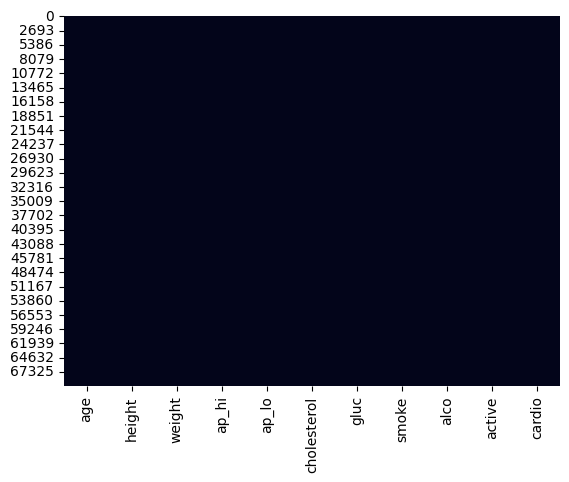

In [ ]:
# Explore missing values

sns.heatmap(heart_data.isnull(), cbar=False)

# **Explore the distribution of the target variable**

<Axes: >

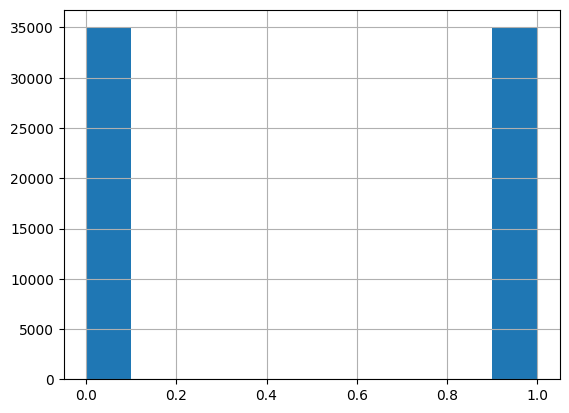

In [ ]:
#Explore the distribution of the target variable
heart_data.cardio.hist()


# **Explore the information value and distribution of features using the pairplot**

In [ ]:
#sns.pairplot(heart_data, hue = 'cardio')

# **Logistic Regression**

In [ ]:
X = heart_data.drop('cardio', axis=1)
y = heart_data['cardio']

In [ ]:
#Development of Logistic Regression Model 
X_logit_scaled = heart_data.drop('cardio', axis=1)
scaler = MinMaxScaler()
X_logit= scaler.fit_transform(X_logit_scaled)
X_logit
X_rescaled = pd.DataFrame(X_logit, columns=X_logit_scaled.columns)
X_rescaled.describe()
y =heart_data['cardio']



In [ ]:
X_rescaled.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0
3,0.528455,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [ ]:
logit_model=sm.Logit(y_train,X_train)
logmodel=logit_model.fit()
print(logmodel.summary2())

Optimization terminated successfully.
         Current function value: 0.623456
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.101     
Dependent Variable: cardio           AIC:              61118.6626
Date:               2023-04-21 18:14 BIC:              61206.6584
No. Observations:   49000            Log-Likelihood:   -30549.   
Df Model:           9                LL-Null:          -33963.   
Df Residuals:       48990            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
age             1.5894   0.0525  30.2551 0.0000   1.4864   1.6924
height        -10.1495   0.2042 -49.7075 0.0000 -10.5497  -9.7493


In [ ]:
X_rescaled

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0
3,0.528455,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
69995,0.653659,0.579487,0.347368,0.016698,0.013550,0.0,0.0,1.0,0.0,1.0
69996,0.913899,0.528205,0.610526,0.017934,0.014453,0.5,0.5,0.0,0.0,1.0
69997,0.640186,0.656410,0.500000,0.020408,0.014453,1.0,0.0,0.0,1.0,0.0
69998,0.900736,0.553846,0.326316,0.017625,0.013550,0.0,0.5,0.0,0.0,0.0


In [ ]:
X_new = X_rescaled.drop(['smoke'],axis=1)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_new, y, test_size=0.3, random_state=1)

logis_reg_stat=sm.Logit(y_train_log, X_train_log)
logmodel_2=logis_reg_stat.fit()
print(logmodel_2.summary2())

Optimization terminated successfully.
         Current function value: 0.623502
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.100     
Dependent Variable: cardio           AIC:              61121.2275
Date:               2023-04-21 18:14 BIC:              61200.4236
No. Observations:   49000            Log-Likelihood:   -30552.   
Df Model:           8                LL-Null:          -33963.   
Df Residuals:       48991            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
age             1.5848   0.0525  30.1963 0.0000   1.4819   1.6876
height        -10.0994   0.2027 -49.8123 0.0000 -10.4968  -9.7020


In [ ]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
logmodel.coef_

array([[ 2.30584584, -1.40243077,  4.62066775,  6.92081182,  8.21229122,
         1.22606108, -0.25245735, -0.10424773, -0.10792064, -0.19780569]])

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred)

array([[7112, 3240],
       [4201, 6447]])

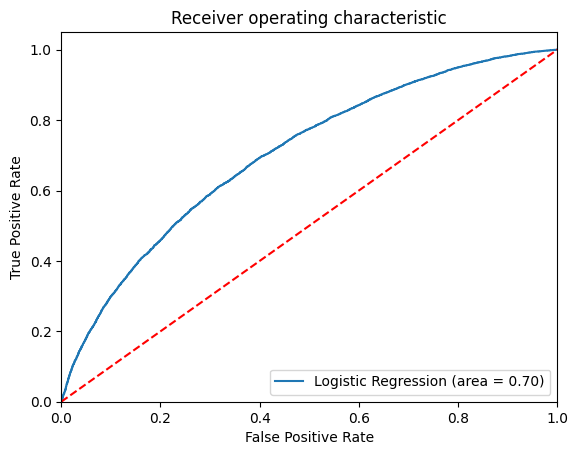

In [ ]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Accuracy #Recall # Precision 

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.63      0.69      0.66     10352
           1       0.67      0.61      0.63     10648

    accuracy                           0.65     21000
   macro avg       0.65      0.65      0.65     21000
weighted avg       0.65      0.65      0.65     21000



# **kNN - Model**

In [ ]:
#Development of kNN Model 
subsample_size = 7000
np.random.seed(42)
subsample_idx = np.random.choice(range(len(X_train)), size=subsample_size, replace=False)
X_subsample = X_train.iloc[subsample_idx]
y_subsample = y_train.iloc[subsample_idx]




optimum k value is :  98


<Axes: >

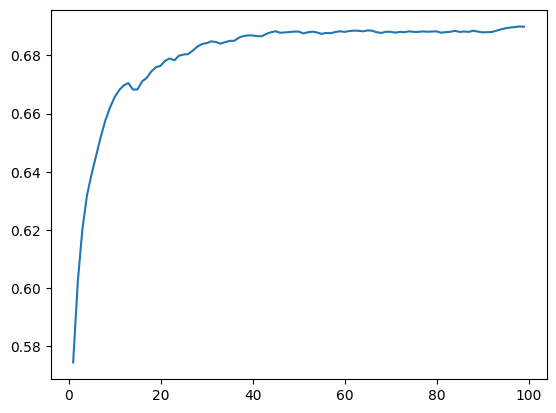

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_subsample,y_subsample.values.ravel(),cv = 3,scoring = "roc_auc")
    cv_scores.append(scores.mean())

print("optimum k value is : ",cv_scores.index(max(cv_scores))+1)
sns.lineplot(x=range(1,max_K), y=cv_scores)


In [ ]:
print('Optimal k value is: ', cv_scores.index(max(cv_scores))+1)

Optimal k value is:  98


In [ ]:
#Development of the model with optimum k value =5 

X_train_kNN, X_test_kNN, y_train_kNN, y_test_kNN = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)
kNN = KNeighborsClassifier(n_neighbors=98, metric='euclidean')
kNN.fit(X_train_kNN, y_train_kNN)

y_pred_kNN = kNN.predict(X_test_kNN)



print(confusion_matrix(y_test_kNN,y_pred_kNN))
print(classification_report(y_test_kNN,y_pred_kNN))

[[7111 3241]
 [4376 6272]]
              precision    recall  f1-score   support

           0       0.62      0.69      0.65     10352
           1       0.66      0.59      0.62     10648

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000



In [ ]:
print('ROC AUC: %0.2f' %roc_auc_score(y_test_kNN,kNN.predict_proba(X_test_kNN)[:,1]))

ROC AUC: 0.69


In [ ]:
#Running the model with optimal K value =5

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_knn, y_train_knn)

y_pred_knn = knn.predict(X_test_knn)



print(confusion_matrix(y_test_knn,y_pred_knn))
print(classification_report(y_test_knn,y_pred_knn))

[[6420 3932]
 [4494 6154]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.60     10352
           1       0.61      0.58      0.59     10648

    accuracy                           0.60     21000
   macro avg       0.60      0.60      0.60     21000
weighted avg       0.60      0.60      0.60     21000



In [ ]:

knn_roc_auc = roc_auc_score(y_test,knn.predict_proba(X_test_knn)[:,1])
print('ROC AUC: %0.2f' %roc_auc_score(y_test_knn,knn.predict_proba(X_test_knn)[:,1]))



   

ROC AUC: 0.63


The optimal K value is 98. Since the cross validations uses smaller subset the ROC value produced for k=98 is 0.69 and while the ROC value produced for k=5 is 0.63.Thus the model is good suited for optimum value of k=98

# **Random Forest Model** 

In [ ]:
# Development of Random Forest 

rf_model  = RandomForestClassifier(max_depth=5, random_state=0)
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

confusion_matrix(y_test,y_pred_rf)

array([[8365, 1987],
       [3692, 6956]])

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75     10352
           1       0.78      0.65      0.71     10648

    accuracy                           0.73     21000
   macro avg       0.74      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



In [ ]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
print("ROC AUC %0.2f" %rf_roc_auc)

ROC AUC 0.80


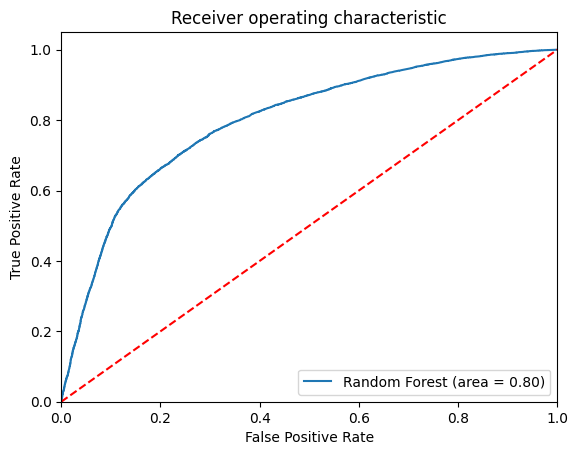

In [ ]:
# Random Forest 
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Boosted tree model**

In [ ]:
# Boosted tree model

from sklearn.ensemble import AdaBoostClassifier

bt_model = AdaBoostClassifier(n_estimators=100)

bt_model.fit(X_train,y_train)

y_pred_bt = bt_model.predict(X_test)

confusion_matrix(y_test,y_pred_bt)

array([[8355, 1997],
       [3699, 6949]])

In [ ]:
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])
print('ROC AUC: %0.2f' %bt_roc_auc)

ROC AUC: 0.80


In [ ]:
print(classification_report(y_test,y_pred_bt))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75     10352
           1       0.78      0.65      0.71     10648

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.74      0.73      0.73     21000



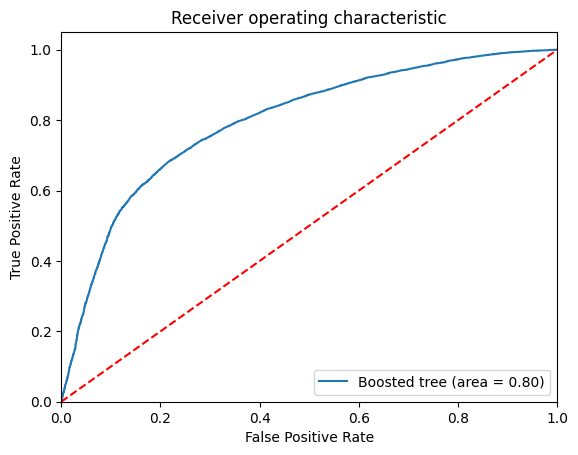

In [ ]:

# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **Naive Bayes Model**

In [ ]:
X_naive = pd.get_dummies(heart_data.drop('cardio', axis=1))
y_naive = heart_data['cardio'].astype('category')

In [ ]:
X_naive.loc[:, X_naive.isnull().any()].columns

Index([], dtype='object')

In [ ]:
X_train_naive, X_test_naive, y_train_naive, y_test_naive = train_test_split(X_naive, y_naive, test_size=0.33, random_state=1)
X_train_naive = np.clip(X_train_naive, 0, None)

In [ ]:
heart_data_nb = MultinomialNB(alpha=0.01)
heart_data_nb.fit(X_train_naive, y_train_naive) 

y_pred = heart_data_nb.predict(X_test_naive)

print(confusion_matrix(y_test_naive,y_pred))
print(classification_report(y_test_naive,y_pred))

[[10060  1301]
 [ 8709  3030]]
              precision    recall  f1-score   support

           0       0.54      0.89      0.67     11361
           1       0.70      0.26      0.38     11739

    accuracy                           0.57     23100
   macro avg       0.62      0.57      0.52     23100
weighted avg       0.62      0.57      0.52     23100



In [ ]:
nb_roc_auc = roc_auc_score(y_test_naive, heart_data_nb.predict_proba(X_test_naive)[:,1])
print('ROC AUC: %0.2f' %nb_roc_auc)

ROC AUC: 0.60


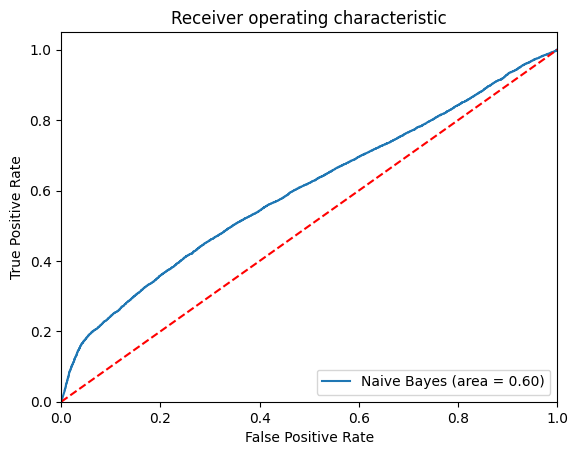

In [ ]:
nb_roc_auc = roc_auc_score(y_test_naive, heart_data_nb.predict_proba(X_test_naive)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test_naive, heart_data_nb.predict_proba(X_test_naive)[:,1])

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# run once to install eli5 package

!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=789ff6a4d619fec59225b9be00cd2fd7a3d2515f3f95659549b79ce989be7746
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(heart_data_nb, random_state=1).fit(X_test_naive, y_test_naive)
eli5.show_weights(perm, feature_names = X_test_naive.columns.tolist())

Weight,Feature
0.0667 ± 0.0048,ap_lo
0.0468 ± 0.0021,ap_hi
0.0014 ± 0.0015,height
0.0010 ± 0.0011,cholesterol
0.0006 ± 0.0004,weight
-0.0001 ± 0.0002,gluc
-0.0002 ± 0.0002,smoke
-0.0005 ± 0.0003,alco
-0.0006 ± 0.0003,active
-0.0303 ± 0.0027,age


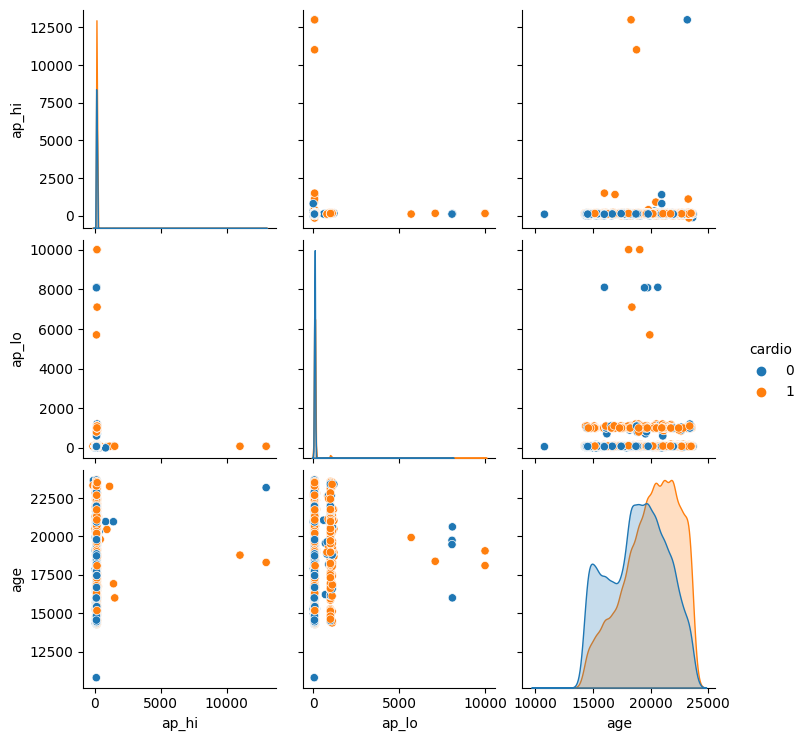

In [ ]:
x_y = pd.concat([X_test_naive,y_test_naive], axis=1)

sns.pairplot(x_y[['ap_hi','ap_lo','age','cardio']], hue='cardio')


# **ANN Model**

In [ ]:
MLPC_model = MLPClassifier(hidden_layer_sizes=20, activation='logistic', solver='adam', random_state=1,max_iter=1000)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)



In [ ]:
print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

[[6986 3366]
 [3967 6681]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.66     10352
           1       0.66      0.63      0.65     10648

    accuracy                           0.65     21000
   macro avg       0.65      0.65      0.65     21000
weighted avg       0.65      0.65      0.65     21000



In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))

ROC AUC:  0.7111760598677128


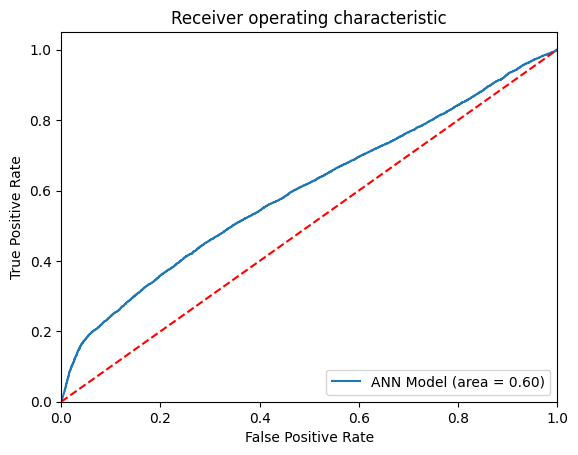

In [ ]:
ANN_roc_auc = roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1])
ANN_fpr,ANN_tpr,ANN_thresholds=roc_curve(y_test,MLPC_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='ANN Model (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## **Deep Learning Model**

In [ ]:
model = Sequential()
model.add(Dense(units=70,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=35,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=18,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=64,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
766/766 [==============================] - 5s 4ms/step - loss: 0.6789 - val_loss: 0.6564
Epoch 2/200
766/766 [==============================] - 3s 3ms/step - loss: 0.6590 - val_loss: 0.6393
Epoch 3/200
766/766 [==============================] - 2s 3ms/step - loss: 0.6524 - val_loss: 0.6358
Epoch 4/200
766/766 [==============================] - 2s 3ms/step - loss: 0.6468 - val_loss: 0.6341
Epoch 5/200
766/766 [==============================] - 3s 4ms/step - loss: 0.6456 - val_loss: 0.6344
Epoch 6/200
766/766 [==============================] - 3s 4ms/step - loss: 0.6417 - val_loss: 0.6306
Epoch 7/200
766/766 [==============================] - 2s 3ms/step - loss: 0.6426 - val_loss: 0.6322
Epoch 8/200
766/766 [==============================] - 2s 3ms/step - loss: 0.6417 - val_loss: 0.6289
Epoch 9/200
766/766 [==============================] - 3s 3ms/step - loss: 0.6406 - val_loss: 0.6299
Epoch 10/200
766/766 [==============================] - 4s 5ms/step - loss: 0.6396 - val_lo

<Axes: >

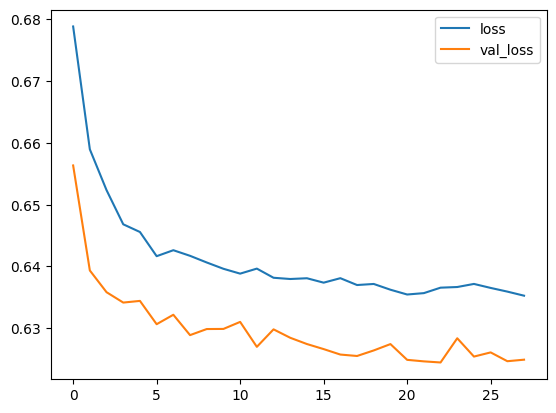

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
y_pred =(model.predict(X_test) > 0.5).astype("int32")

657/657 [==============================] - 1s 1ms/step


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.68      0.66     10352
           1       0.67      0.62      0.64     10648

    accuracy                           0.65     21000
   macro avg       0.65      0.65      0.65     21000
weighted avg       0.65      0.65      0.65     21000



In [ ]:
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

657/657 [==============================] - 1s 2ms/step
ROC AUC:  0.7107818046680222


# **Performance of All the models**

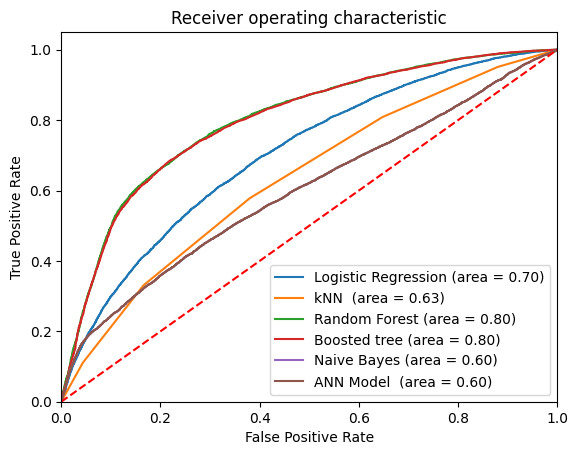

In [ ]:
#logistic regression 
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

#kNN model
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test,knn.predict_proba(X_test_knn)[:,1])



#Random Forrest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])


#Boosted Tree
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])
 
#Naive Bayes
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test_naive, heart_data_nb.predict_proba(X_test_naive)[:,1])

#ANN Model
ANN_fpr,ANN_tpr,ANN_thresholds=roc_curve(y_test,MLPC_model.predict_proba(X_test)[:,1])


plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='kNN  (area = %0.2f)' % knn_roc_auc)

plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)

plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)

plt.plot(nb_fpr, nb_tpr, label='ANN Model  (area = %0.2f)' % nb_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# **DATA VISUALISATION**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
# Uploading the Dataset

from google.colab import files
uploaded = files.upload()

import io
heart_data= pd.read_csv(('heart_data.csv'))

Saving heart_data.csv to heart_data (3).csv


In [ ]:
heart_data.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


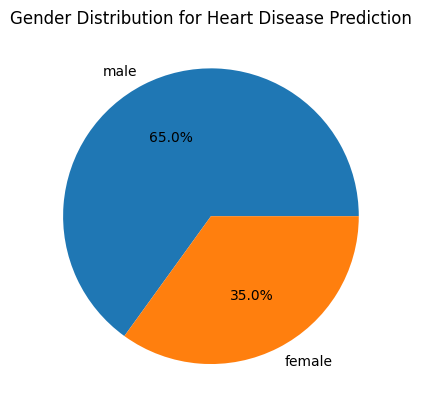

In [40]:
#Pie chart seeing the distribution of males and females for the predicting the heart diseases.
# Get counts of unique values in gender column
gender_counts = heart_data['gender'].value_counts()

# Create pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

colors = ['#0066CC', '#3399FF']


# Add title
plt.title('Gender Distribution for Heart Disease Prediction')

# Display plot
plt.show()

<Axes: xlabel='active', ylabel='count'>

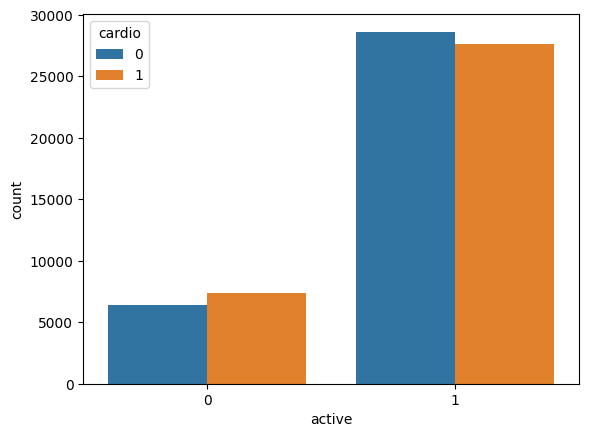

In [39]:
# Use Seaborn library to create a bar plot of age groups and cardio column
sns.countplot(data=heart_data, x='active', hue='cardio')

In [44]:
# Group the age column into different age groups
heart_data['weight_group'] = pd.cut(heart_data['weight'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])


Text(0, 0.5, 'No. of patients')

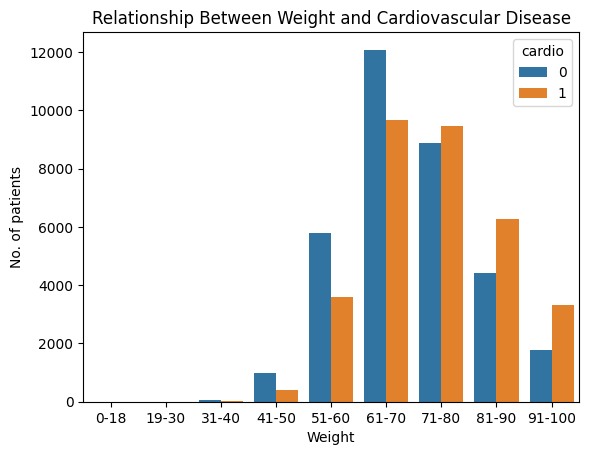

In [57]:
#Plot a countplot
sns.countplot(data=heart_data, x='weight_group', hue='cardio')
# Add title
plt.title('Relationship Between Weight and Cardiovascular Disease')
# Add title, x-axis label, and y-axis label
plt.title('Relationship Between Weight and Cardiovascular Disease')
plt.xlabel('Weight')
plt.ylabel('No. of patients')


Text(0, 0.5, 'No. of patients')

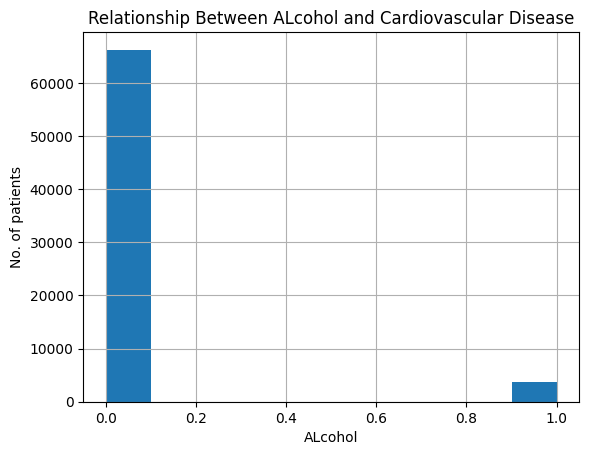

In [65]:
#Target variable (Attrition) into 1(Yes) or 0(No)
heart_data.loc[heart_data['alco'] == "Yes", 'alco'] = 1 
heart_data.loc[heart_data['alco'] == "No", 'alco'] = 0 
heart_data.alco.hist()
plt.title('Relationship Between ALcohol and Cardiovascular Disease')
plt.xlabel('ALcohol')
plt.ylabel('No. of patients')


Text(0, 0.5, 'No. of patients')

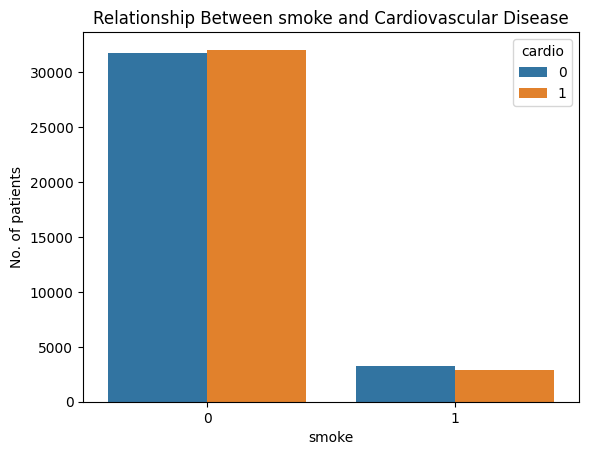

In [67]:
# Use Seaborn library to create a bar plot of age groups and cardio column
sns.countplot(data=heart_data, x='smoke', hue='cardio')
plt.title('Relationship Between smoke and Cardiovascular Disease')
plt.xlabel('smoke')
plt.ylabel('No. of patients')
